In [17]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [8]:
# # read dataset from a Google Drive File
file_link = '/content/air_quality_health_impact_data.csv'

df = pd.read_csv(file_link)


# let's look at the first few instances
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [10]:
print("Shape",df.shape)
df.info()

Shape (5811, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64

In [11]:
# Check Unique Values
df.nunique()

,0
RecordID,5811
AQI,5811
PM10,5811
PM2_5,5811
NO2,5811
SO2,5811
O3,5811
Temperature,5811
Humidity,5811
WindSpeed,5811


In [12]:
# Check for missing values
df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [13]:
#check the cat and num column name
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']


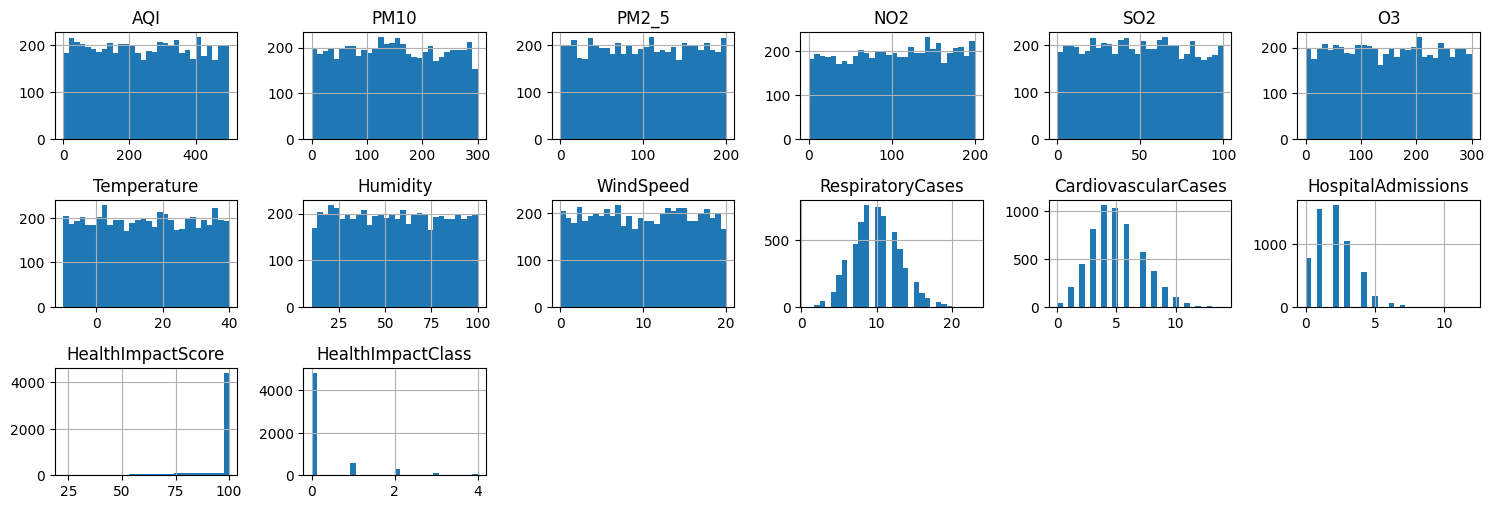

In [43]:
df.hist(bins=30, figsize=(15, 10), layout=(6, 6))

plt.tight_layout()
plt.show()

# Visualize the distribution of the 'HealthImpactClass' variable



HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64


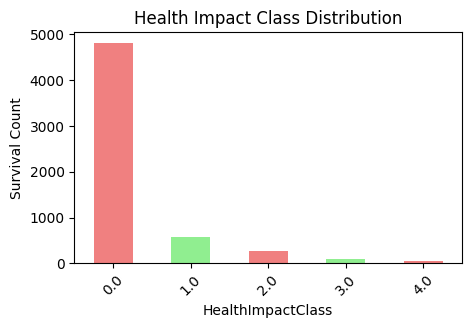

In [14]:

print(df.value_counts('HealthImpactClass'))

plt.figure(figsize=(5, 3))
df['HealthImpactClass'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Health Impact Class Distribution')
plt.xlabel('HealthImpactClass')
plt.ylabel('Survival Count')
plt.xticks(rotation = 45)
plt.show()

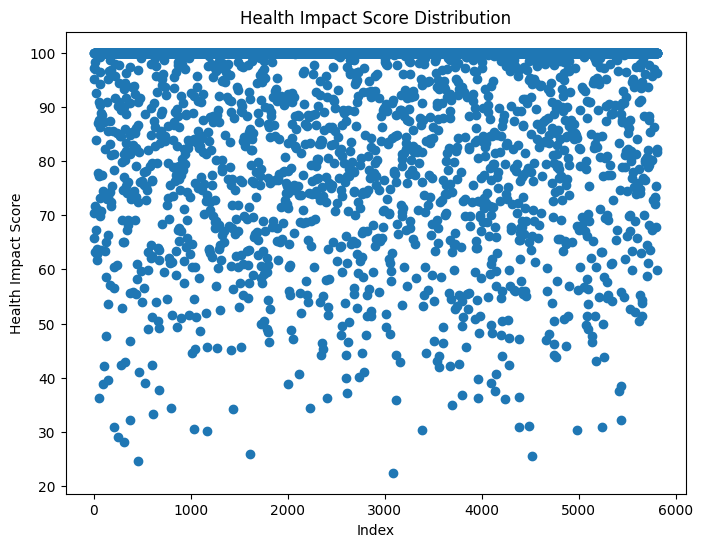

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['HealthImpactScore'])
plt.xlabel("Index")
plt.ylabel("Health Impact Score")
plt.title("Health Impact Score Distribution")
plt.show()

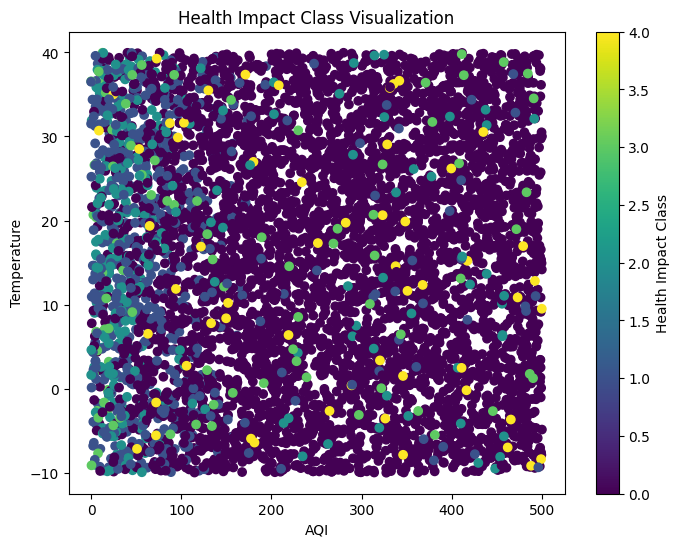

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AQI'], df['Temperature'], c=df['HealthImpactClass'])
plt.xlabel("AQI")
plt.ylabel("Temperature")
plt.title("Health Impact Class Visualization")
plt.colorbar(label="Health Impact Class")
plt.show()

<Figure size 800x600 with 0 Axes>

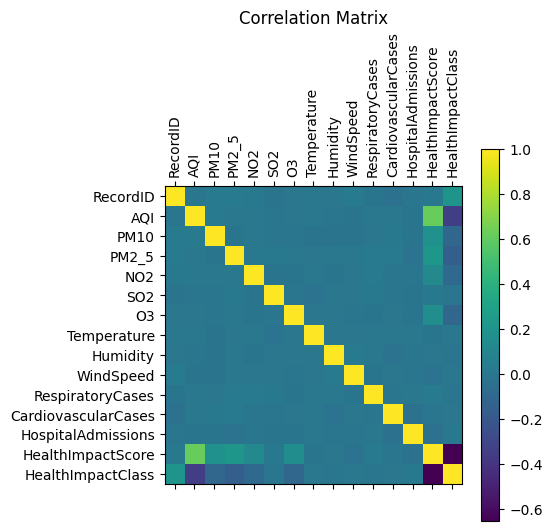

In [20]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
#print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [21]:
# Drop redundant features
df = df.drop(['RecordID'], axis=1) #axis=1 is column, 0 is row
df

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [22]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)
df

(5811, 14)


,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0


In [23]:
# Split the data into 80-20 train-test split

X = df.drop(['HealthImpactClass'], axis=1) # features
y = df['HealthImpactClass'] # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4648, 13)
X_test shape: (1163, 13)
y_train shape: (4648,)
y_test shape: (1163,)


# Implementing Decision Tree Classifier

Decision Tree Classifier Accuracy: 0.9466895958727429


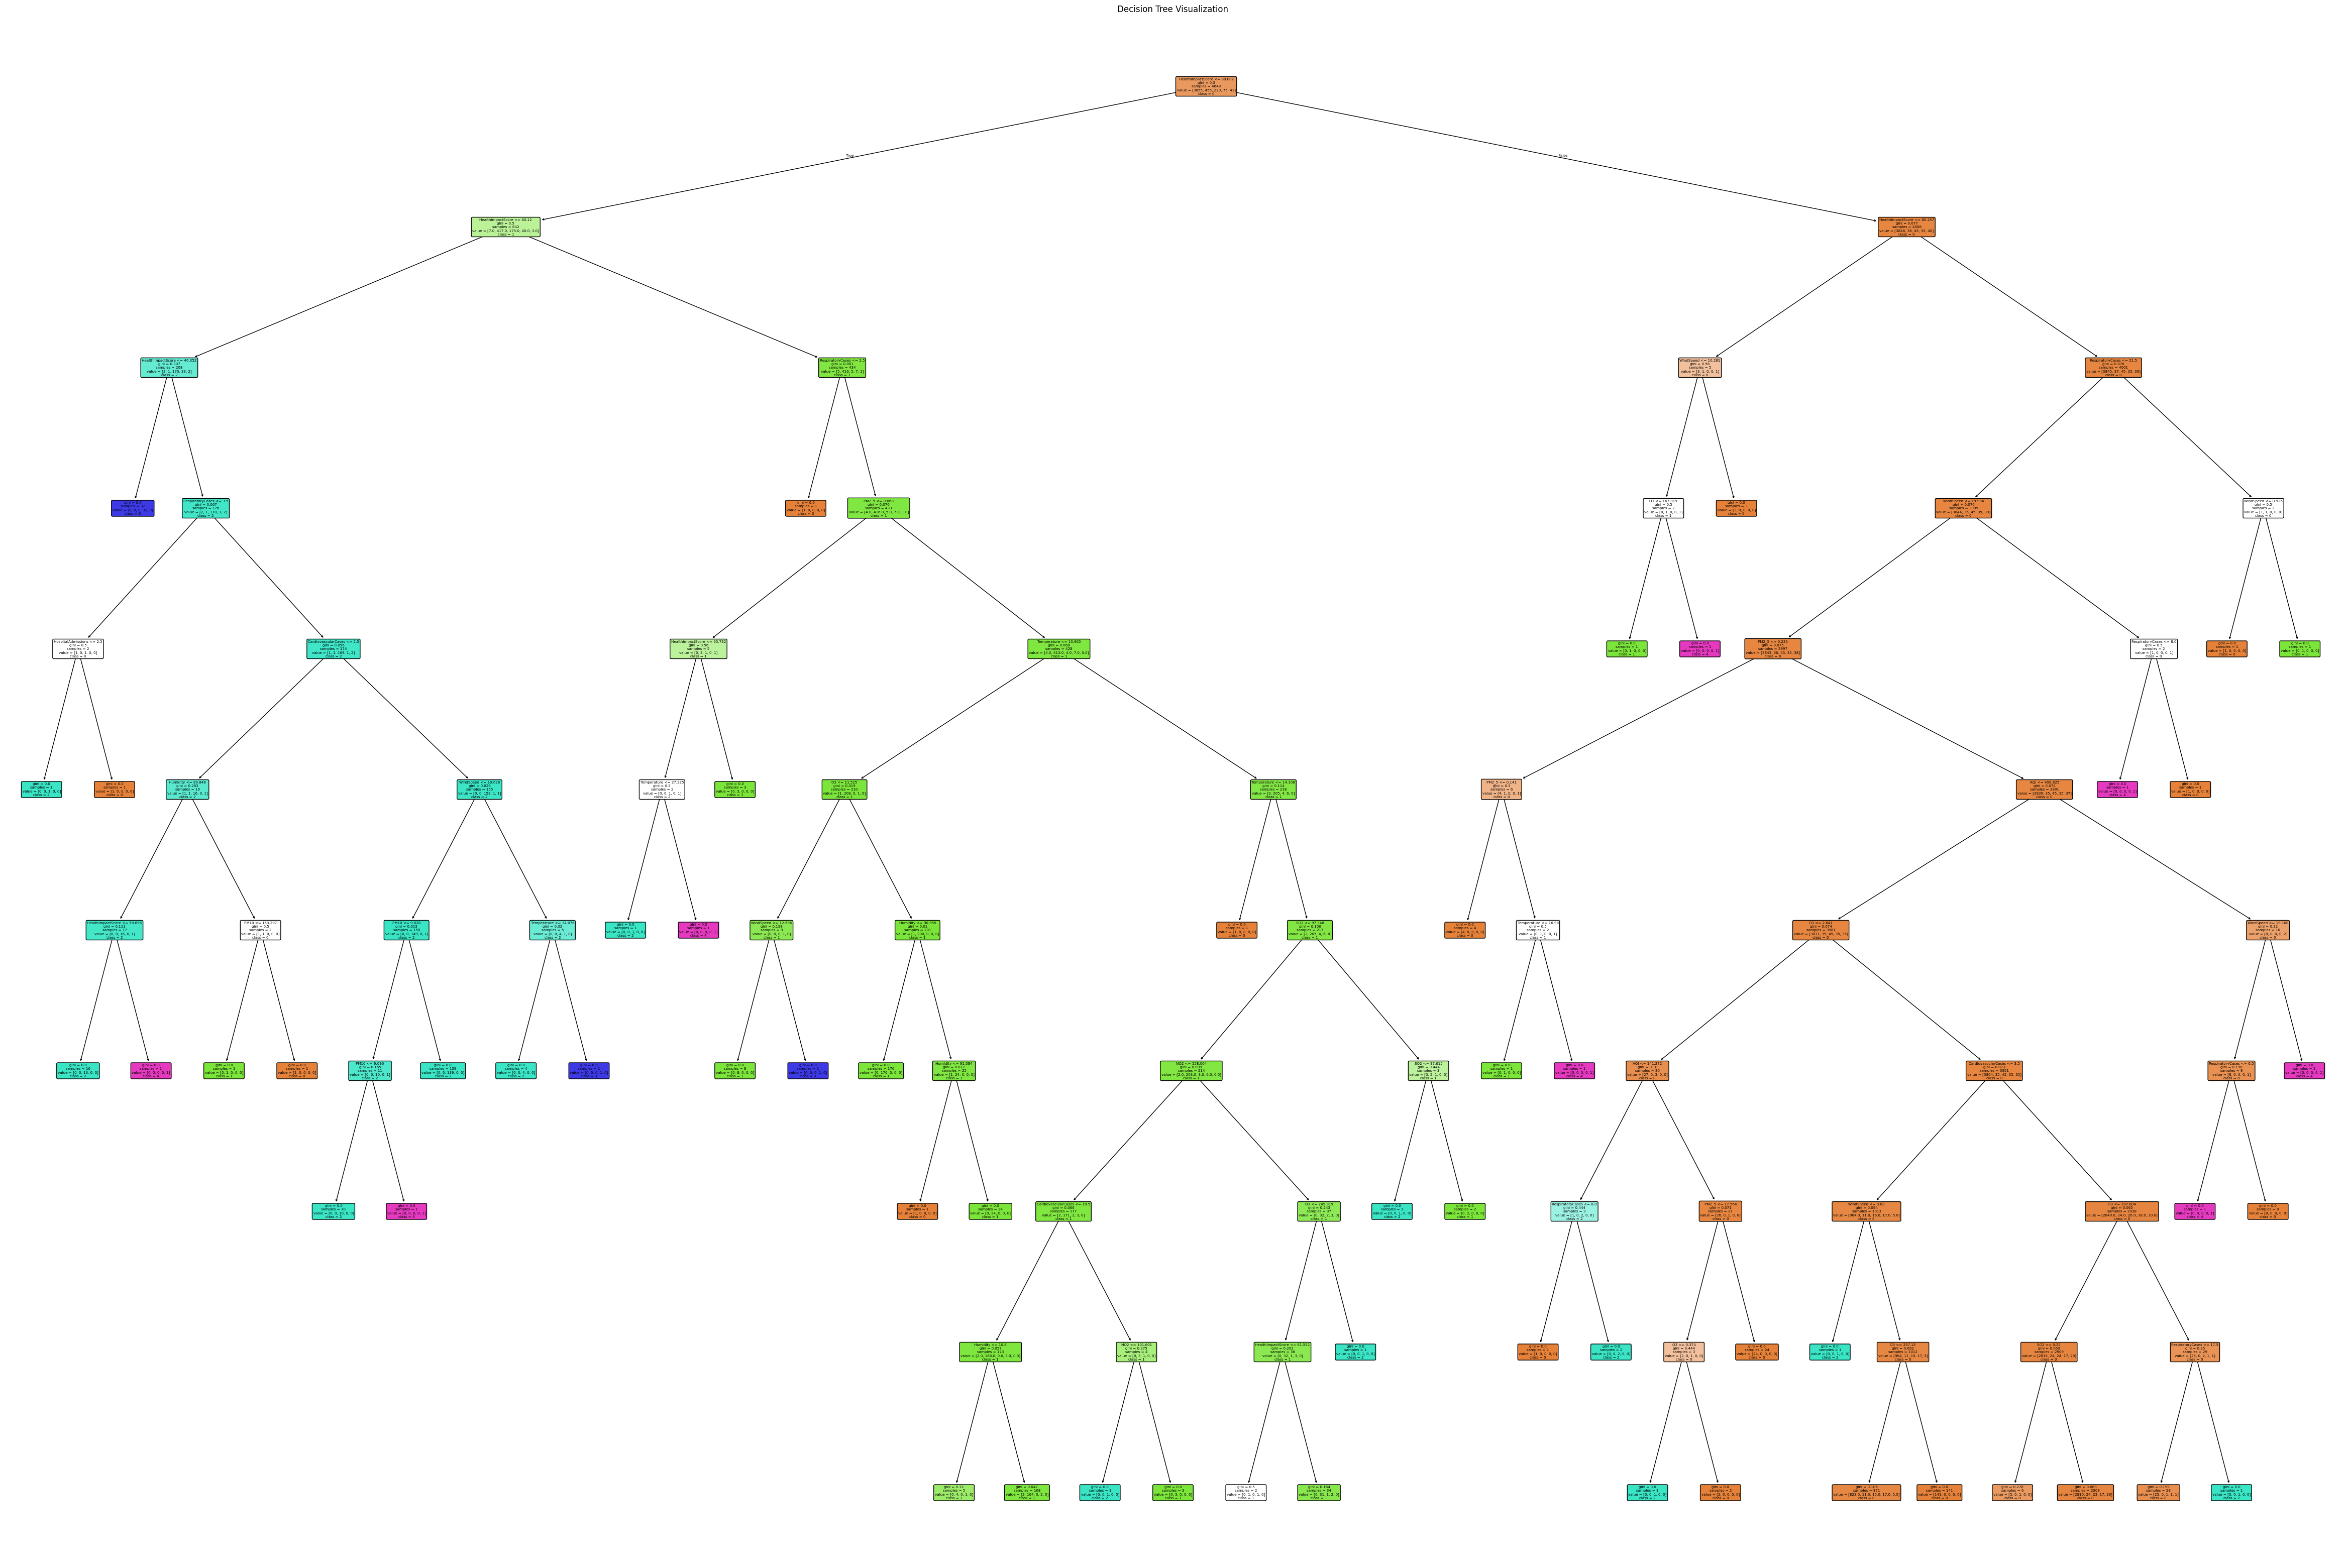

In [25]:

decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Visualize the Decision Tree
plt.figure(figsize=(60, 40))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['0','1','2','3','4'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Implementing Random Forest Classifier

Random Forest Classifier Accuracy: 0.9492691315563199


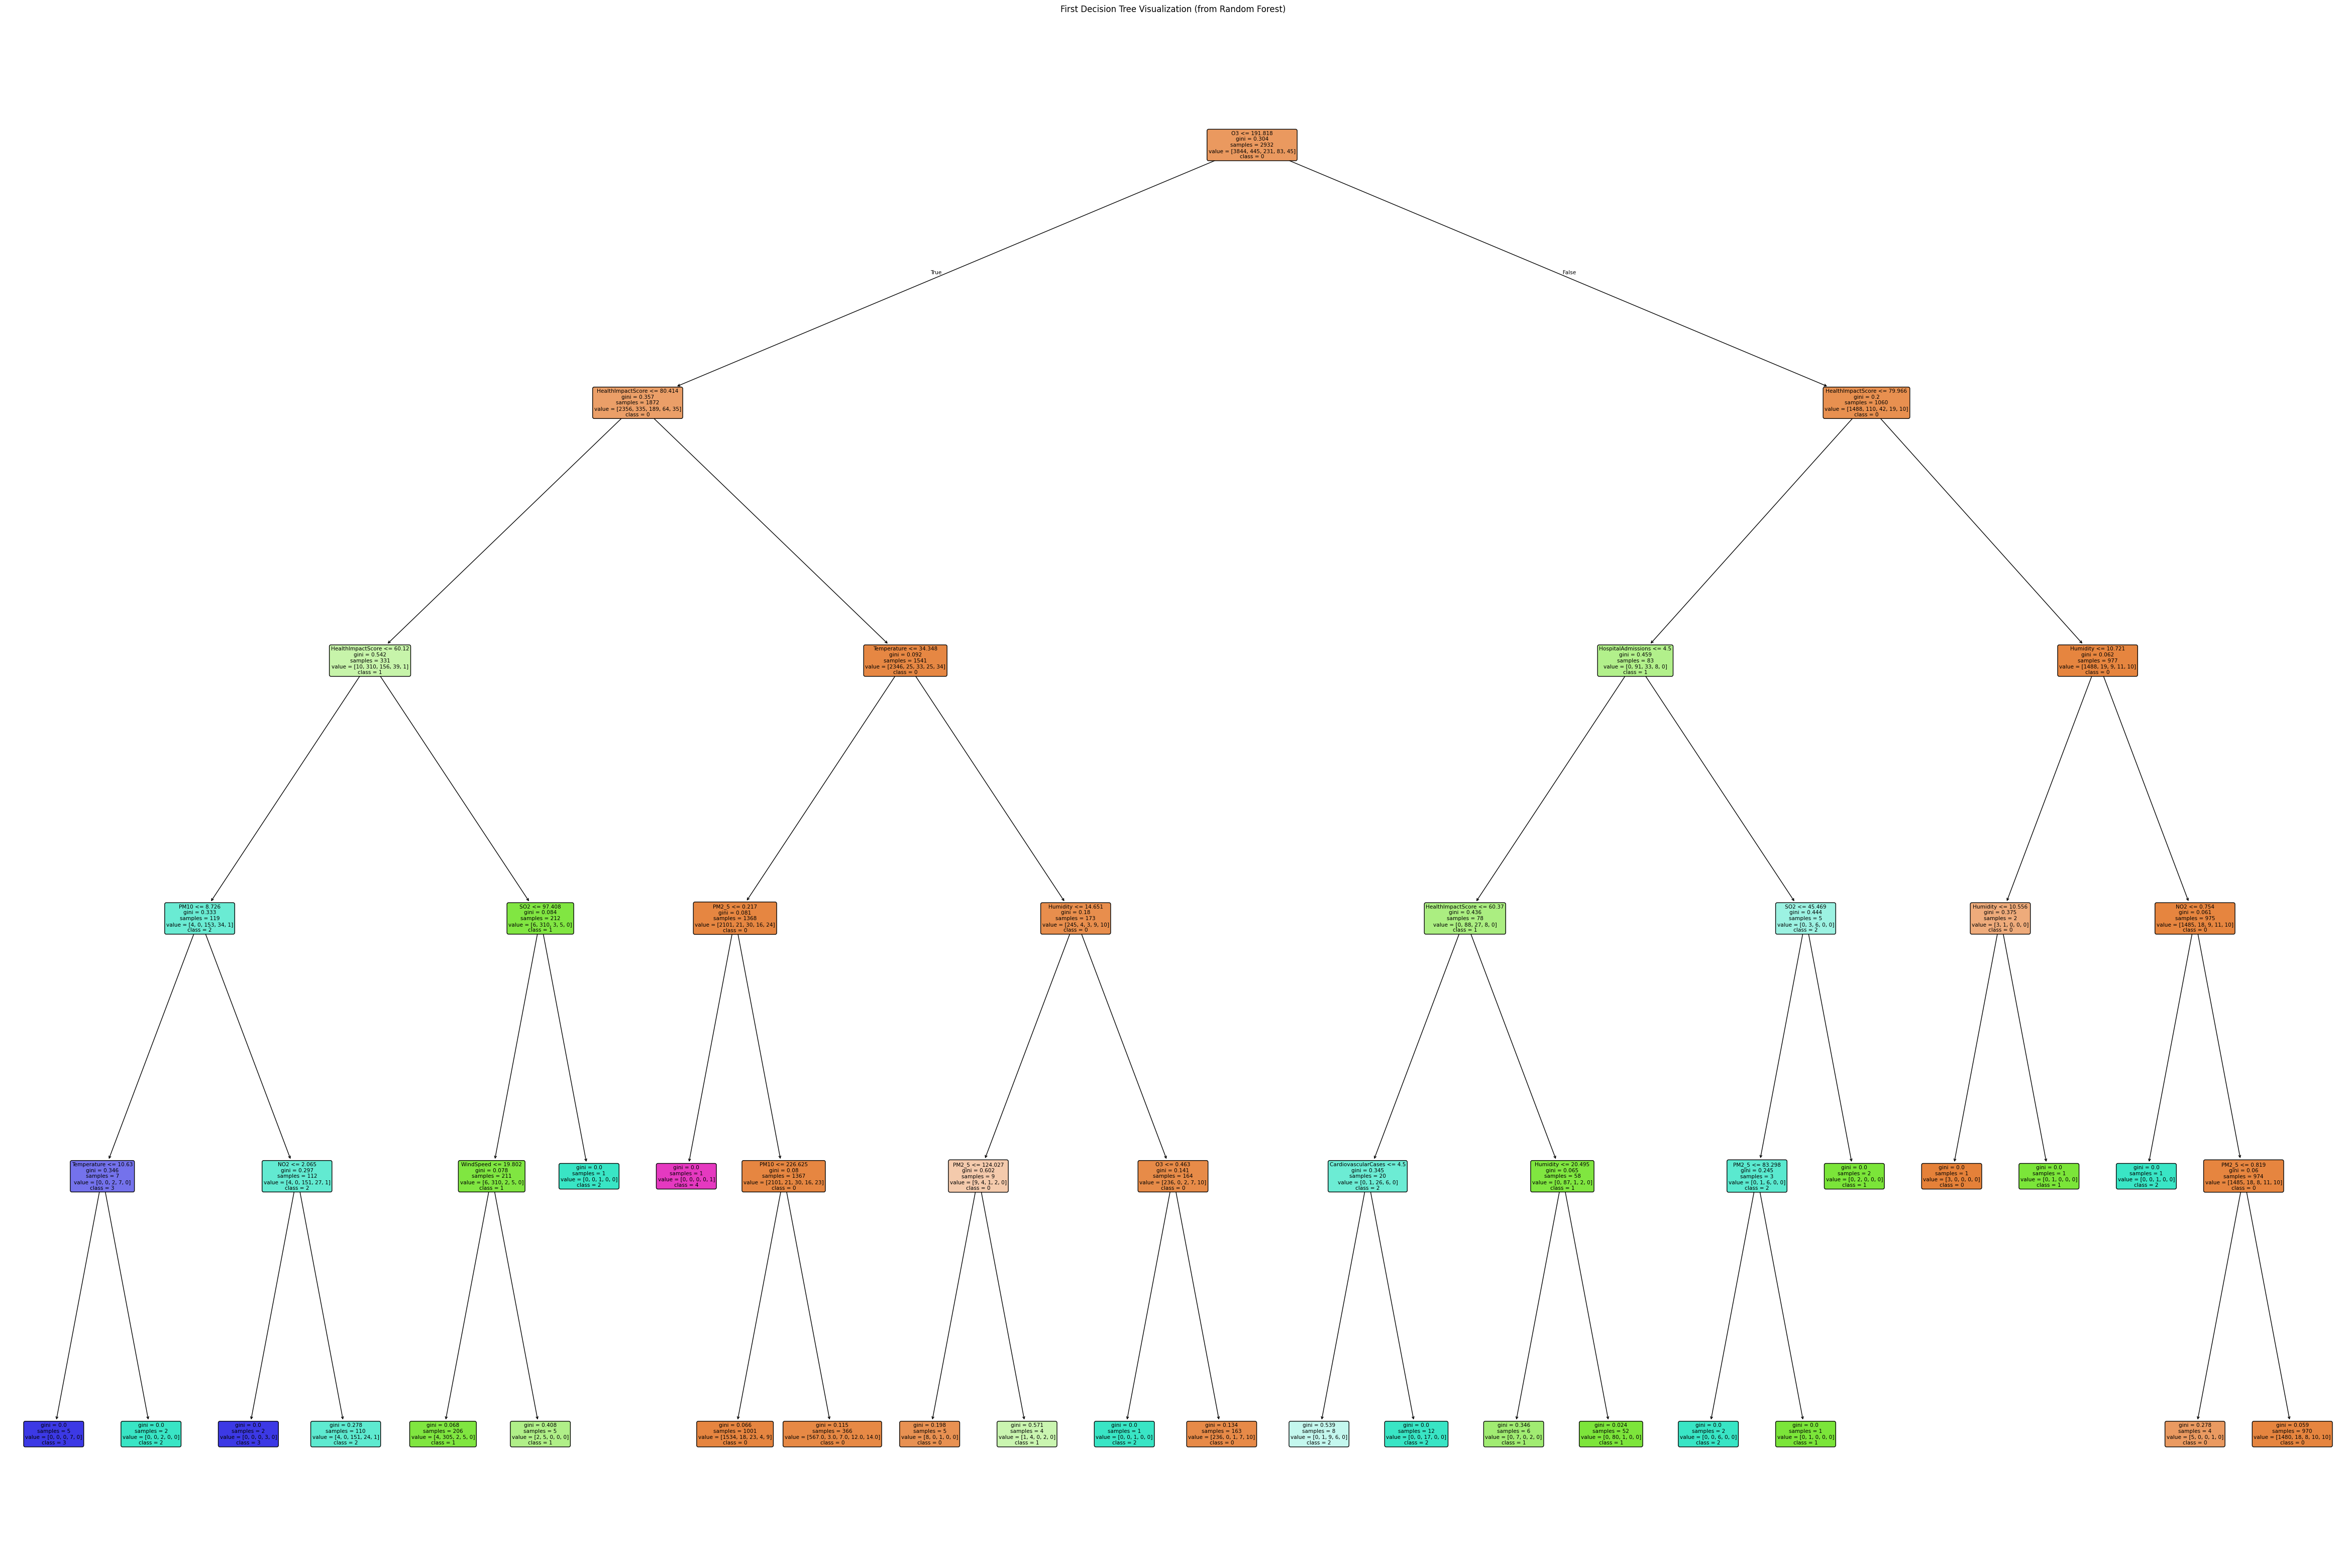

In [26]:

random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['0','1','2','3','4'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

In [27]:
# Implementing Ada Boost

n_estimators = [20]
learning_rate = [1]

for i in n_estimators:
  for j in learning_rate:
    abc = AdaBoostClassifier(n_estimators = i, learning_rate = j, random_state = 42)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # plot_adaboost(X, y, model)
    print(f"For n_estimators = {i} and learning_rate = {j}")
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

For n_estimators = 20 and learning_rate = 1
Accuracy score (training): 0.957
Accuracy score (validation): 0.957


# Implementing KNN

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [34]:
for k in range(6, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k = {k}: {accuracy:.2f}')

Accuracy for k = 6: 0.91
Accuracy for k = 7: 0.91
Accuracy for k = 8: 0.91
Accuracy for k = 9: 0.91
Accuracy for k = 10: 0.92
Accuracy for k = 11: 0.92
Accuracy for k = 12: 0.92
Accuracy for k = 13: 0.92
Accuracy for k = 14: 0.92
Accuracy for k = 15: 0.92
Accuracy for k = 16: 0.92
Accuracy for k = 17: 0.92
Accuracy for k = 18: 0.92
Accuracy for k = 19: 0.93
Accuracy for k = 20: 0.92


In [39]:
X2 = df.drop(['HealthImpactClass','HealthImpactScore'], axis=1)
y2 = df['HealthImpactScore']
features_train, features_test, target_train, target_test = train_test_split(X2, y2, test_size=0.2, random_state=3)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(features_train, target_train)

predictions = knn_regressor.predict(features_test)
r2 = r2_score(target_test, predictions)
print(r2)

0.9534874626916504


# Implementing Support Vector Machine

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop(['HealthImpactClass'], axis=1)
y = df['HealthImpactClass']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.942390369733448


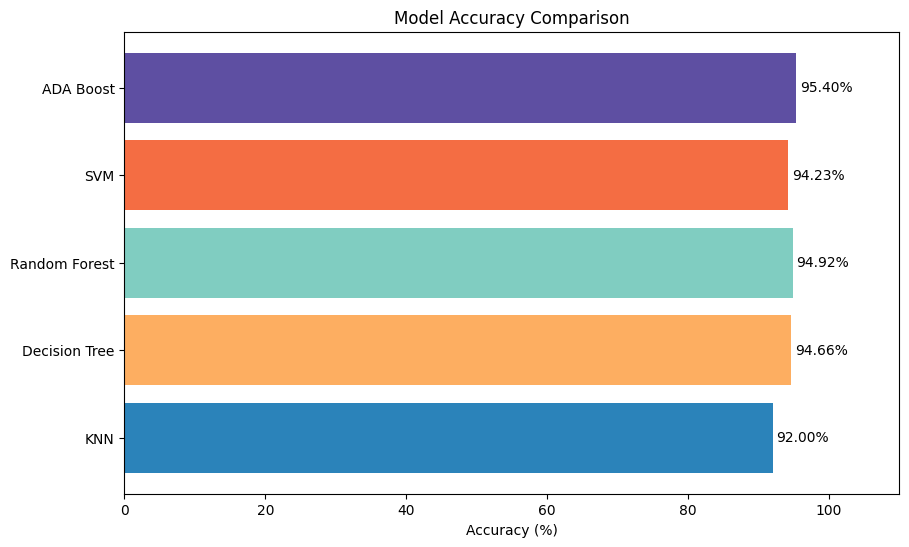

In [44]:
accuracy_percentages = {
    'KNN': 0.92 * 100,
    'Decision Tree': 0.9466 * 100,
    'Random Forest': 0.9492 * 100,
    'SVM': 0.9423 * 100,
    'ADA Boost': 0.954 * 100,
    }

models = list(accuracy_percentages.keys())
accuracy_values = list(accuracy_percentages.values())

# Formal colors for research
colors = ['#2b83ba', '#fdae61', '#80cdc1', '#f46d43', '#5e4fa2']
 #  blue, orange, green, red, purple (modified to avoid specified colors)

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_values, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 110)

for index, value in enumerate(accuracy_values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()